In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('ggplot')
%matplotlib inline

In [5]:
df=pd.read_csv('./TransportData/data_nanjing.csv')
df.head()

,,X1路(阅城国际南门--汇康路)
0,,16路(龙福山庄总站--中山码头北)
1,,溧水112路(柘塘--汽车客运站)
2,,135路(油坊桥地铁站--岱山中路南)
3,,197路(尧化门总站--摄山星城总站北)
4,,河西有轨电车1号线(奥体中心东门站--)


In [14]:
df=pd.read_csv('./TransportData/data_nanjing.csv',names=['roads','lines'])
df.head()

,roads,lines
0,,X1路(阅城国际南门--汇康路)
1,,16路(龙福山庄总站--中山码头北)
2,,溧水112路(柘塘--汽车客运站)
3,,135路(油坊桥地铁站--岱山中路南)
4,,197路(尧化门总站--摄山星城总站北)


In [15]:
df['roads'][0]

' '

In [16]:
len(df['roads'])

8920

In [18]:
df=df[df['roads']!=' ']
len(df['roads'])

8708

In [20]:
df.groupby(by='lines').count()

,roads
lines,
100路(南医大二附院总站--安德门),78
101路(五马渡总站北--仙新路地铁站),140
102路(白龙江西街总站--邺城路·龙王大,18
103路(西春路南--中和村南),16
104路(莫愁新寓--郑和南路),23
...,...
高淳105路(环2路)(高淳枢纽站--高淳枢,96
高淳106路(水产市场--双牌石客运站),82
高淳107路(凤山--淳中路口),102


In [22]:
len(df.groupby(by='roads').count())

1585

In [23]:
dv=df.groupby(by='roads').count().sort_values(by='lines',ascending=False)
dv.head()

,lines
roads,
G42-沪蓉高速公路,52
中山东路,44
软件大道,44
应天大街,41
宁镇公路,37


In [24]:
dv=dv.reset_index()
dv.head()

,roads,lines
0,G42-沪蓉高速公路,52
1,中山东路,44
2,软件大道,44
3,应天大街,41
4,宁镇公路,37


In [25]:
dv.to_csv('./TransportData/data_nangjing_graphic.csv')

In [26]:
dk=dv.reset_index()
dk.head()

,index,roads,lines
0,0,G42-沪蓉高速公路,52
1,1,中山东路,44
2,2,软件大道,44
3,3,应天大街,41
4,4,宁镇公路,37


In [27]:
dk['index']=dk['index']+1
dk.head()

,index,roads,lines
0,1,G42-沪蓉高速公路,52
1,2,中山东路,44
2,3,软件大道,44
3,4,应天大街,41
4,5,宁镇公路,37


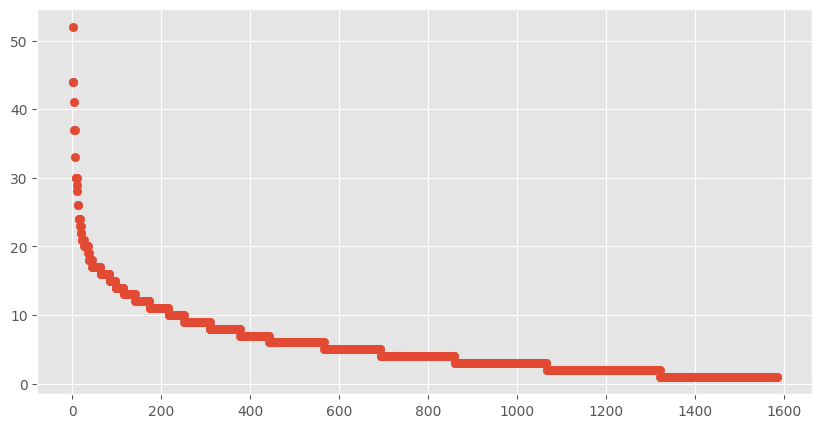

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(dk['index'],dk['lines'])
plt.show()

In [30]:
from scipy import optimize
import scipy.stats
plt.figure(figsize=(10,5))
x= dk['index']
y= dk['lines']
def fm(x,a,b):
    return a*x**b
ft1,ft2 = optimize.curve_fit(fm,x,y)
print(ft1)

[76.02462466 -0.41959918]


<Figure size 1000x500 with 0 Axes>

In [31]:
_y=[y for y in fm(x,ft1[0],ft1[1])]
print(_y)

[76.02462465921258, 56.83846571336897, 47.94624483149128, 42.494273390119766, 38.69608656392801, 35.84616175555528, 33.60097212627591, 31.770091755476553, 30.23812881347429, 28.93044456667181, 27.796285949032875, 26.79974870026684, 25.91460362503505, 25.121172392447573, 24.40435646649188, 23.752347072395835, 23.155754131939936, 22.607002079987563, 22.099900876277047, 21.629335086444716, 21.191034396607375, 20.78140145979207, 20.39738085439386, 20.036358014987382, 19.69608034337804, 19.3745949581431, 19.07019908136203, 18.78140013328875, 18.506883363169738, 18.245485387075107, 17.996172397408866, 17.75802209794683, 17.530208632959987, 17.31198994003822, 17.10269707820182, 16.90172517609037, 16.70852571683621, 16.522599932006507, 16.343493120638723, 16.17078974377918, 16.00410917220541, 15.843101986777581, 15.687446748337042, 15.536847168176227, 15.391029621553232, 15.24974095606409, 15.112746554341589, 14.979828616853855, 14.850784635790463, 14.725426035354902, 14.603576957394045, 14.48

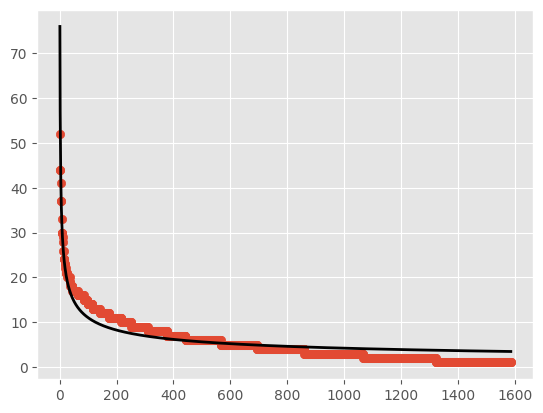

In [32]:
plt.scatter(x,y)
plt.plot(x,_y,color='k',lw=2)
plt.show()

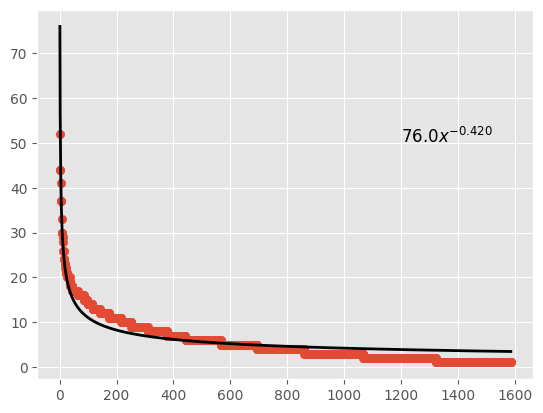

In [34]:
plt.scatter(x,y)
plt.plot(x,_y,color='k',lw=2)
plt.text(1200,50,'${%.1f}x^{%.3f}$'%(ft1[0],ft1[1]),fontsize=12)
plt.show()

In [36]:
s1,i,r,p,s2=scipy.stats.linregress(y,_y)
print(r**2)

0.8744519984115776


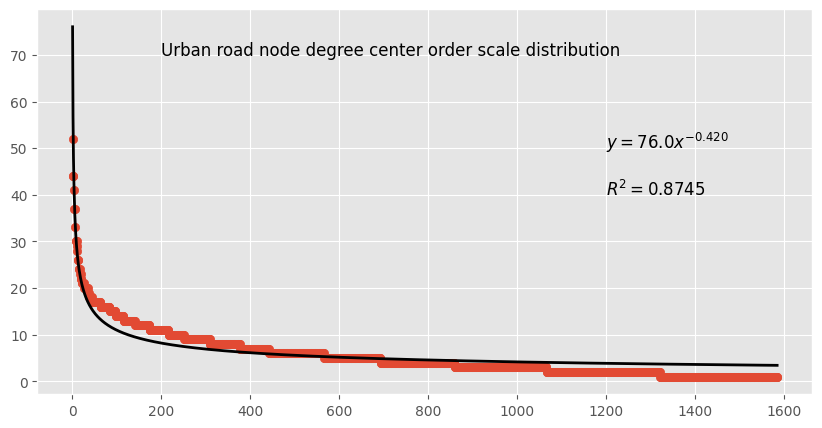

In [48]:
plt.figure(figsize=(10,5))
x=dk['index']
y=dk['lines']
def fm(x,a,b):
    return a*x**b
ft1,ft2 = optimize.curve_fit(fm,x,y)
_y=[y for y in fm(x,ft1[0],ft1[1])]
s1,i,r,p,s2=scipy.stats.linregress(y,_y)
plt.scatter(x,y)
plt.plot(x,_y,color='k',lw=2)
plt.text(200,70,'Urban road node degree center order scale distribution',fontsize=12)
plt.text(1200,50,'$y={%.1f}x^{%.3f}$'%(ft1[0],ft1[1]),fontsize=12)
plt.text(1200,40,'$R^2={%.4f}$'%(r**2),fontsize=12)
plt.show()